# DDPG Reacher Bots

### 1. Start the Environment

In [1]:
# install all dependencies
# !pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.9 which is incompatible.


If environment are not included in the repo, please visit https://github.com/Unity-Technologies/ml-agents for them.

In [2]:
import numpy as np
from unityagents import UnityEnvironment

# load 1 agent
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# load 20 agents
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Peek State and Action Spaces

In [4]:
# reset environment
env_info = env.reset(train_mode=True)[brain_name]

# agent number
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of action space
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Train the Agent with DDPG

In [5]:
from agent import Agent
from collections import deque
import torch

# init agent and reset env
agent = Agent(33, 4, 0)
env_info = env.reset(train_mode=True)[brain_name]

In [6]:
def DDPG(n_episodes=300, max_t=300, print_every=1):
    'Deep Deterministic Policy Gradient'
    
    # scores (deque for the recent 100 episodes, see benchmark requirements)
    scores_deque = deque(maxlen=100)
    scores = []
    
    for i_episode in range(1, n_episodes+1):
        # reset env | get initial state | reset agent | initialize scores
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros((20,))
        
        while True:
            # get action | get env info | step/learn | get new states | get score
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += np.array(rewards)
            if any(dones):
                break 
                
        # process score
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        
        # keep track if anything goes wrong
        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(
            i_episode, scores[-1], np.mean(scores_deque)))
        
        # save progress
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        # benchmark met
        if len(scores_deque) == 100 and np.mean(scores_deque) >= 30:
            print('Yeet')
            break
            
    return scores

In [7]:
# train
scores = DDPG()

Episode 1	Score: 0.19	Average Score: 0.19
Episode 2	Score: 0.02	Average Score: 0.10
Episode 3	Score: 0.14	Average Score: 0.11
Episode 4	Score: 0.03	Average Score: 0.09
Episode 5	Score: 1.13	Average Score: 0.30
Episode 6	Score: 1.47	Average Score: 0.50
Episode 7	Score: 2.40	Average Score: 0.77
Episode 8	Score: 3.12	Average Score: 1.06
Episode 9	Score: 3.65	Average Score: 1.35
Episode 10	Score: 4.13	Average Score: 1.63
Episode 11	Score: 7.69	Average Score: 2.18
Episode 12	Score: 10.81	Average Score: 2.90
Episode 13	Score: 11.89	Average Score: 3.59
Episode 14	Score: 13.78	Average Score: 4.32
Episode 15	Score: 15.82	Average Score: 5.09
Episode 16	Score: 16.72	Average Score: 5.81
Episode 17	Score: 16.73	Average Score: 6.45
Episode 18	Score: 18.28	Average Score: 7.11
Episode 19	Score: 17.73	Average Score: 7.67
Episode 20	Score: 17.65	Average Score: 8.17
Episode 21	Score: 18.12	Average Score: 8.64
Episode 22	Score: 19.91	Average Score: 9.16
Episode 23	Score: 22.28	Average Score: 9.73
Episode 

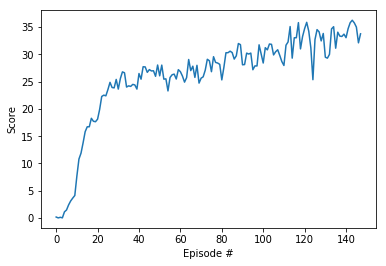

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# save scores
fig.savefig('score.png')

In [12]:
# clean up
env.close()